<a href="https://colab.research.google.com/github/luispmorera/TP_Morera_Luis_Data_Science/blob/main/NLP_CODERHOUSE_DICIEMBRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introducción
En este proyecto de análisis de texto, el objetivo principal es aplicar técnicas de procesamiento de lenguaje natural (NLP) para analizar un discurso pronunciado por el presidente Javier Milei en el foro "Ideas". Este discurso es un ejemplo clave de cómo las herramientas de NLP pueden ser utilizadas para desentrañar patrones, temas y generar respuestas automáticas a preguntas basadas en el contenido de un texto.

El discurso fue extraído de un archivo de texto (.txt) y contiene una serie de ideas clave sobre la visión económica y política de Milei, sus propuestas y sus reflexiones sobre el futuro de Argentina. Este análisis tiene como objetivo entender los puntos más importantes del discurso, cómo se estructuran las ideas a lo largo del mismo y la posibilidad de generar un sistema automatizado que pueda responder preguntas relacionadas con el contenido del discurso.

A lo largo del informe, se detallarán las técnicas aplicadas para el preprocesamiento del texto, la construcción del modelo de lenguaje y los resultados obtenidos al entrenar un modelo de deep learning para analizar y generar respuestas basadas en el contenido del discurso.

Descripción del código y técnica utilizada:

1. Librerías y métodos usados:
requests: Esta librería permite realizar solicitudes HTTP y obtener el contenido de una página web.
BeautifulSoup (de bs4): Es una herramienta para analizar (parsear) documentos HTML y XML. Aquí, se usa para extraer información de una página web de forma sencilla y eficiente.
2. Pasos realizados:
Descargar el contenido de la página: Con requests.get(url), el código hace una solicitud GET a la URL proporcionada y descarga el contenido de la página web.
Verificación de éxito de la descarga: La condición if response.status_code == 200 verifica si la solicitud fue exitosa (código de estado 200 significa éxito). Si es exitosa, muestra un mensaje confirmando que la página se descargó correctamente.
Extracción de texto: Se extrae todo el contenido de la página utilizando soup.get_text(), que recoge solo el texto plano sin los tags HTML. Sin embargo, este texto puede ser largo y desordenado, por lo que se recomienda refinarlo según las necesidades específicas del análisis (por ejemplo, extrayendo solo el texto del cuerpo, eliminando posibles etiquetas HTML innecesarias, etc.).
Visualización parcial del texto: Finalmente, se imprime una muestra de los primeros 1000 caracteres del texto extraído para revisar la calidad de la extracción.

3. Convertir a minúsculas. Eliminar saltos de línea y espacios innecesarios. Eliminar caracteres no alfanuméricos

4. Descargar stopwords. Limpieza del texto .Tokenización. Eliminación de stopwords.

5. Análisis de frecuencia de palabras

6. Analisis de sentimiento del texto, el resultado es una polaridad primariamente negativa y subjetividad media

7. Establezco algunas stopwords para visualizar un gráfico de frecuencia de palabras y nube de palabras mas representativos del texto analizado

8. Realizo un análisis de n-gramas para ver co-ocurrencia de palabras

9. Realizo  un análisis de redes semánticas y grafico utilizando los bigramas y trigramas creados antes.

10. Realizo: Análisis de Sentimiento. Reconocimiento de Entidades Nombradas (NER) y Análisis de Temas con LDA.

In [ ]:
!pip install requests beautifulsoup4 nltk scikit-learn


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL del discurso
url = "https://www.casarosada.gob.ar/informacion/discursos/50772-palabras-del-presidente-de-la-nacion-javier-milei-en-la-cena-de-la-fundacion-faro"  # Reemplaza con el enlace correcto

# Descargar el contenido de la página
response = requests.get(url)
if response.status_code == 200:
    print("Página descargada exitosamente")
else:
    print(f"Error al descargar la página: {response.status_code}")

# Extraer el HTML
html_content = response.text

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extraer el texto
text = soup.get_text()  # Esto extrae todo el texto; puedes refinarlo.
print(text[:1000])  # Muestra los primeros 1000 caracteres para revisar.



Página descargada exitosamente






Palabras del Presidente de la Nación, Javier Milei, en la cena de la Fundación Faro































































Toggle navigation






Casa Rosada Presidencia de la Nación





Autoridades 

PresidenteJavier Milei
VicepresidenteVictoria Villarruel
Jefe de Gabinete de MinistrosGuillermo Alberto Francos
Secretaria GeneralKarina Milei
Vocero PresidencialManuel Adorni



Información 



Información
Trámites y servicios
Mapa del Estado
Actividad oficial


Conferencias
Discursos
Fotos


Paseo de la República


Archivo



Transparencia




Nuestro País
Acerca de Argentina
Organización
Símbolos Nacionales

Constitución Nacional

Presidentes





La Casa 


Historia
Puntos de Interés

Visitas Guiadas

Museo
Bustos Presidenciales
















EN

































Palabras del Presidente de la Nación, Javier Milei, en la cena de la Fundación Faro


Compartilo en redes :






Tweet




                     

In [ ]:
import re

# Limpiar el texto: eliminar saltos de línea, espacios innecesarios, caracteres extra
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text)  # Eliminar saltos de línea y espacios extra
    text = re.sub(r'[^\w\sáéíóúñ]', '', text)  # Eliminar caracteres no alfanuméricos (excepto tildes y ñ)
    return text

# Limpiar el texto extraído
cleaned_text = clean_text(text)
print(cleaned_text[:1000])  # Muestra los primeros 1000 caracteres para ver cómo quedó



 palabras del presidente de la nación javier milei en la cena de la fundación faro toggle navigation casa rosada presidencia de la nación autoridades presidentejavier milei vicepresidentevictoria villarruel jefe de gabinete de ministrosguillermo alberto francos secretaria generalkarina milei vocero presidencialmanuel adorni información información trámites y servicios mapa del estado actividad oficial conferencias discursos fotos paseo de la república archivo transparencia nuestro país acerca de argentina organización símbolos nacionales constitución nacional presidentes la casa historia puntos de interés visitas guiadas museo bustos presidenciales en palabras del presidente de la nación javier milei en la cena de la fundación faro compartilo en redes  tweet miércoles 13 de noviembre de 2024 palabras del presidente de la nación javier milei en la cena de la fundación faro creo que no les va a molestar que salude con el hola a todos muchas gracias por invitarme al evento de la fundación

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords en español
nltk.download('stopwords')

# Cargar las stopwords en español
stop_words = set(stopwords.words('spanish'))

def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar saltos de línea, espacios innecesarios
    text = re.sub(r'\s+', ' ', text)

    # Eliminar caracteres no alfanuméricos (excepto tildes y ñ)
    text = re.sub(r'[^\w\sáéíóúñ]', '', text)

    # Tokenizar el texto (dividir en palabras)
    tokens = text.split()

    # Eliminar las stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Limpiar el texto extraído
cleaned_tokens = clean_text(text)

# Mostrar los primeros 20 tokens después de la limpieza
print(cleaned_tokens[:20])


['palabras', 'presidente', 'nación', 'javier', 'milei', 'cena', 'fundación', 'faro', 'toggle', 'navigation', 'casa', 'rosada', 'presidencia', 'nación', 'autoridades', 'presidentejavier', 'milei', 'vicepresidentevictoria', 'villarruel', 'jefe']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Tokenizar el texto (dividir en palabras)
tokens = cleaned_text.split()
print(tokens[:20])  # Muestra los primeros 20 tokens para ver cómo se ve



['palabras', 'del', 'presidente', 'de', 'la', 'nación', 'javier', 'milei', 'en', 'la', 'cena', 'de', 'la', 'fundación', 'faro', 'toggle', 'navigation', 'casa', 'rosada', 'presidencia']


In [ ]:
from collections import Counter

# Contar la frecuencia de cada palabra
word_freq = Counter(tokens)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))


[('de', 450), ('que', 426), ('la', 327), ('el', 257), ('y', 246), ('a', 212), ('en', 196), ('es', 166), ('no', 147), ('los', 140)]


In [ ]:
from textblob import TextBlob

# Crear un objeto TextBlob con el texto en español
blob = TextBlob(cleaned_text)

# Obtener el análisis de sentimiento
sentiment = blob.sentiment
print(sentiment)  # Muestra el análisis: polaridad y subjetividad


Sentiment(polarity=0.004519774011299438, subjectivity=0.42429378531073453)


In [ ]:
# Lista personalizada de palabras que quieres eliminar
custom_stopwords = [
    'decir', 'no', 'ustedes', 'año', 'mes', 'fin', 'poder', 'hacer', 'cosas','si','entonces','hace','hoy' 'que'
]

# Función de limpieza de texto (actualizada)
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar saltos de línea, espacios innecesarios
    text = re.sub(r'\s+', ' ', text)

    # Eliminar caracteres no alfanuméricos (excepto tildes y ñ)
    text = re.sub(r'[^\w\sáéíóúñ]', '', text)

    # Tokenizar el texto (dividir en palabras)
    tokens = text.split()

    # Eliminar las stopwords comunes y las personalizadas
    tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]

    return tokens

# Limpiar el texto extraído
cleaned_tokens = clean_text(text)

# Mostrar los primeros 20 tokens después de la limpieza
print(cleaned_tokens[:20])


['palabras', 'presidente', 'nación', 'javier', 'milei', 'cena', 'fundación', 'faro', 'toggle', 'navigation', 'casa', 'rosada', 'presidencia', 'nación', 'autoridades', 'presidentejavier', 'milei', 'vicepresidentevictoria', 'villarruel', 'jefe']


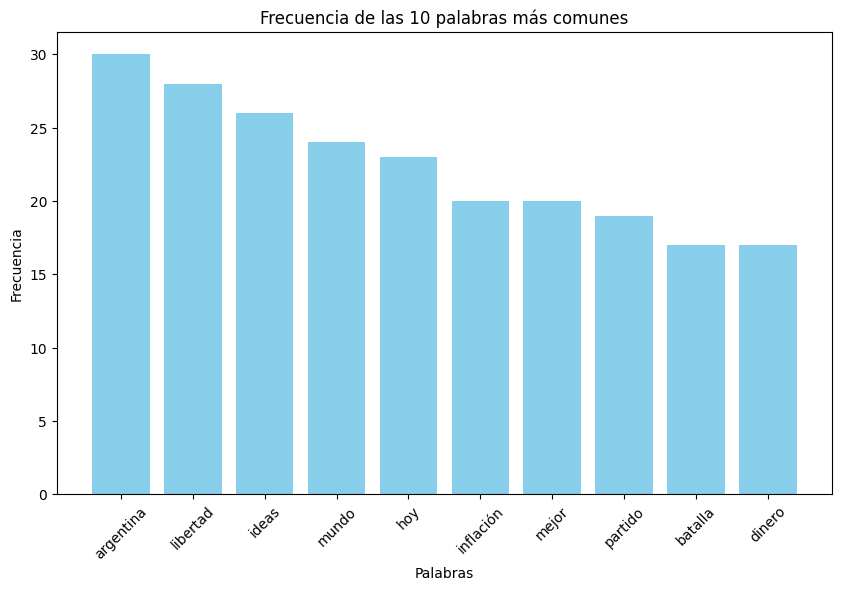

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar la frecuencia de cada palabra en los tokens
word_freq = Counter(cleaned_tokens)

# Obtener las 10 palabras más frecuentes
most_common_words = word_freq.most_common(10)

# Separar las palabras y las frecuencias
words, frequencies = zip(*most_common_words)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 10 palabras más comunes')
plt.xticks(rotation=45)
plt.show()


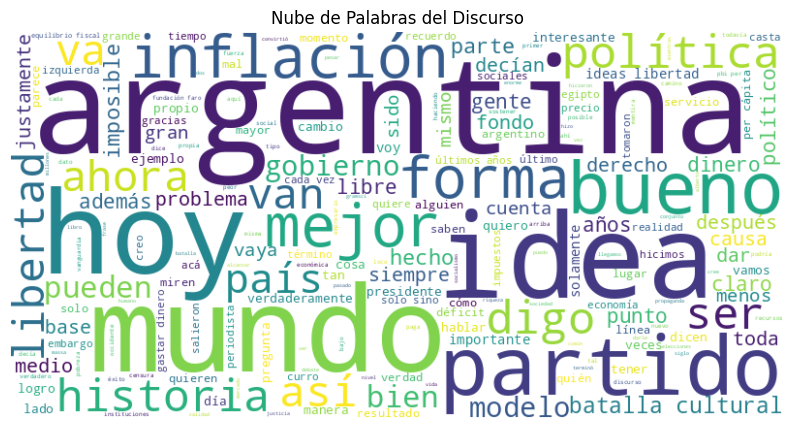

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar la nube de palabras a partir de las palabras limpias
wordcloud = WordCloud(
    stopwords=custom_stopwords,  # Usamos las stopwords personalizadas
    background_color='white',    # Color de fondo de la nube
    width=800, height=400,       # Tamaño de la imagen
    colormap='viridis'           # Paleta de colores
).generate(' '.join(cleaned_tokens))  # Convertimos los tokens en una sola cadena de texto

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.title('Nube de Palabras del Discurso')
plt.show()


In [ ]:
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 89.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from nltk import ngrams
from collections import Counter

# Crear bigramas a partir de los tokens
bigrams = list(ngrams(cleaned_tokens, 2))

# Contar los bigramas
bigram_freq = Counter(bigrams)

# Mostrar los 10 bigramas más frecuentes
print(bigram_freq.most_common(10))


[(('batalla', 'cultural'), 13), (('ideas', 'libertad'), 9), (('per', 'cápita'), 7), (('gastar', 'dinero'), 6), (('cada', 'vez'), 6), (('solo', 'sino'), 6), (('equilibrio', 'fiscal'), 6), (('fundación', 'faro'), 5), (('pbi', 'per'), 5), (('milton', 'friedman'), 4)]


In [ ]:
from nltk import ngrams
from collections import Counter

# Crear bigramas y trigramas a partir de los tokens
bigrams = list(ngrams(cleaned_tokens, 2))
trigrams = list(ngrams(cleaned_tokens, 3))

# Contar los bigramas y trigramas
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Mostrar los 10 bigramas y trigramas más comunes
print("Bigramas más comunes:", bigram_freq.most_common(10))
print("Trigramas más comunes:", trigram_freq.most_common(10))


Bigramas más comunes: [(('batalla', 'cultural'), 13), (('ideas', 'libertad'), 9), (('per', 'cápita'), 7), (('gastar', 'dinero'), 6), (('cada', 'vez'), 6), (('solo', 'sino'), 6), (('equilibrio', 'fiscal'), 6), (('fundación', 'faro'), 5), (('pbi', 'per'), 5), (('milton', 'friedman'), 4)]
Trigramas más comunes: [(('pbi', 'per', 'cápita'), 5), (('mejor', 'gobierno', 'historia'), 4), (('solo', 'sino', 'además'), 4), (('palabras', 'presidente', 'nación'), 3), (('presidente', 'nación', 'javier'), 3), (('nación', 'javier', 'milei'), 3), (('javier', 'milei', 'cena'), 3), (('milei', 'cena', 'fundación'), 3), (('cena', 'fundación', 'faro'), 3), (('mejor', 'calidad', 'mejor'), 3)]


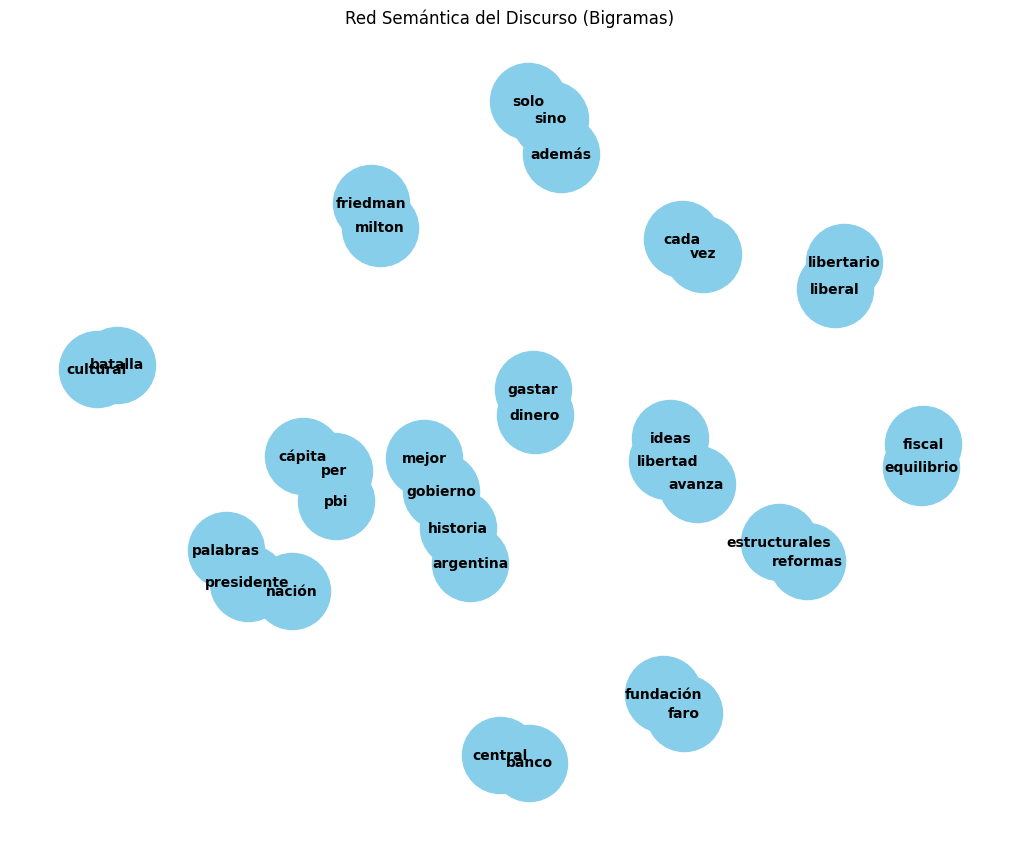

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar los bigramas como nodos con sus frecuencias como pesos
for bigram, freq in bigram_freq.most_common(20):  # Tomar los 20 más comunes
    G.add_edge(bigram[0], bigram[1], weight=freq)

# Configurar la visualización del grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Disposición de los nodos
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.title('Red Semántica del Discurso (Bigramas)')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Crear los datos para el grafo interactivo
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Crear los nodos
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Crear el gráfico
fig = go.Figure()

# Agregar los bordes
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.5, color='gray')))

# Agregar los nodos
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers',
                         marker=dict(color='skyblue', size=10, line=dict(width=1, color='black')),
                         text=list(G.nodes()), hoverinfo='text'))

# Configurar el diseño del gráfico
fig.update_layout(title='Red Semántica del Discurso (Bigramas)', showlegend=False)
fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Análisis de Sentimiento:
Polaridad: -0.004022988505747124
Subjetividad: 0.4143678160919541

Entidades extraídas:
nación javier milei cena - PER
adrián ravier increíble - PER
axel kaiser - PER
doctor alberto benegas lynch - PER
marx - PER
cristina fernández kirchner - PER
cristina fernández kirchner - PER
año - MISC
explosión - LOC
multiplicó población - PER
chile - LOC
axel kaiser - PER
venía - LOC
decía va caer - PER
gramsci - PER
milton friedman - PER
decía milton friedman - PER
martín fierro - PER
línea woke - PER
san pablo - PER
uruguay tabaré - PER
pepe mujica chile - PER
bachelet lagos boric - PER
paraguay - LOC
bolivia - LOC
castillo perú - LOC
colombia lula dilma rousseff brasil - LOC
gratis decía milton friedman judío polaco - PER
egipto - LOC
egipto - LOC
egipto - LOC
egipto - LOC
hará - PER
walkman - PER
básquet hacían - PER
san francisco - LOC
san francisco - LOC
egipto - LOC
santiago - PER
buenos aires - LOC
milton friedman anna - PER
friedman - PER
friedman - PER
súper b

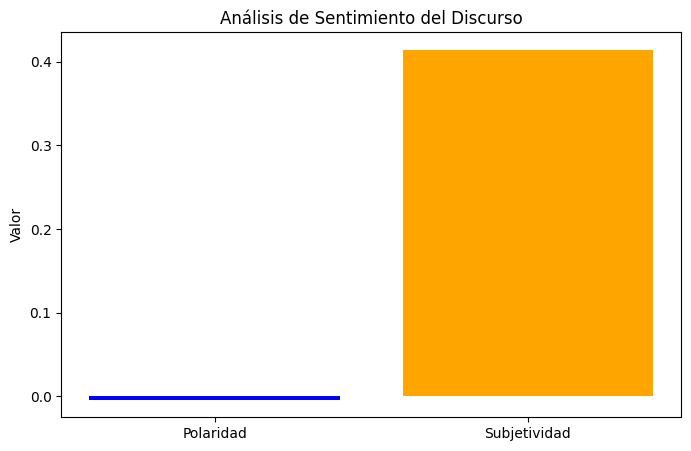

In [ ]:
import nltk
import spacy
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Descargar stopwords de NLTK y el modelo de spaCy
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('es_core_news_sm')  # Cargar el modelo de spaCy para español

# Cargar el archivo de texto (suponiendo que ya tienes el archivo subido)
with open("/content/discurso milei ideas (1).txt", 'r', encoding='utf-8') as file:
    discurso = file.read()

# 1. Preprocesamiento del texto: limpieza y tokenización
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar saltos de línea, espacios innecesarios y caracteres no alfanuméricos
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\sáéíóúñ]', '', text)

    # Tokenización
    tokens = text.split()

    # Eliminar las stopwords usando NLTK
    stop_words = stopwords.words('spanish')
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Limpiar el texto del discurso
discurso_limpio = clean_text(discurso)

# 2. Análisis de Sentimiento con TextBlob
blob = TextBlob(discurso_limpio)
sentiment = blob.sentiment  # Devuelve una tupla (polaridad, subjetividad)

print("\nAnálisis de Sentimiento:")
print(f"Polaridad: {sentiment.polarity}")
print(f"Subjetividad: {sentiment.subjectivity}")

# 3. Extracción de entidades con spaCy
doc = nlp(discurso_limpio)

print("\nEntidades extraídas:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# 4. Modelado de Temas con LDA
# Obtener las stopwords en español desde nltk
stop_words = stopwords.words('spanish')

# Convertir el texto en una matriz de términos (vectorización)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform([discurso_limpio])

# Aplicar LDA para encontrar los temas principales (por ejemplo, 3 temas)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Mostrar las palabras más importantes de cada tema
print("\nPalabras clave para cada tema:")
for index, topic in enumerate(lda.components_):
    print(f'Tema #{index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# 5. Visualización del análisis de sentimiento
# Graficar polaridad y subjetividad
labels = ['Polaridad', 'Subjetividad']
values = [sentiment.polarity, sentiment.subjectivity]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Análisis de Sentimiento del Discurso')
plt.ylabel('Valor')
plt.show()


